In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks,"2008-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-18,8.110,8.220,7.918,7.993,40635
2008-01-22,7.940,7.991,7.626,7.670,57441
2008-01-23,7.685,7.751,7.570,7.621,43756
2008-01-24,7.700,7.864,7.662,7.802,48880
2008-01-25,7.830,8.006,7.771,7.983,41991


In [4]:
data.shape

(4045, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4045 entries, 2008-01-18 to 2024-02-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4045 non-null   float64
 1   High    4045 non-null   float64
 2   Low     4045 non-null   float64
 3   Close   4045 non-null   float64
 4   Volume  4045 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 189.6 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000
mean,3.806945,3.893652,3.716043,3.800026,131282.259333
std,1.860484,1.909619,1.807519,1.855642,54366.367098
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.686000,2.734000,2.634000,2.684000,92962.000000
50%,3.273000,3.340000,3.211000,3.266000,126582.000000
75%,4.277000,4.364000,4.191000,4.271000,160936.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


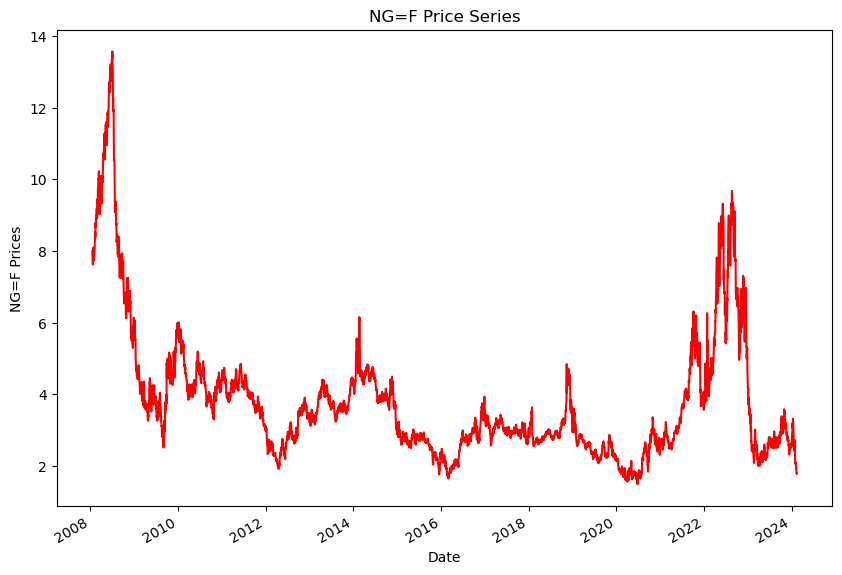

In [7]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25264\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

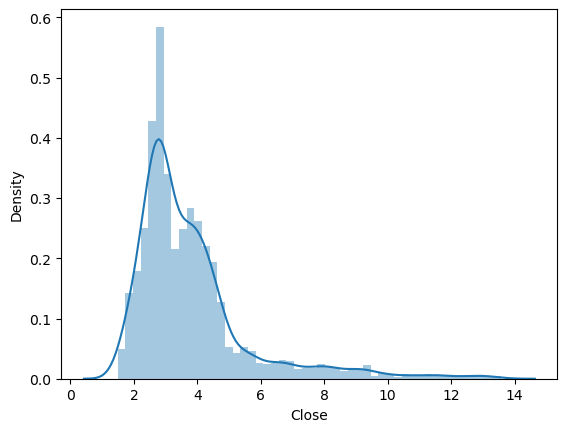

In [8]:
sns.distplot(data["Close"])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25264\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

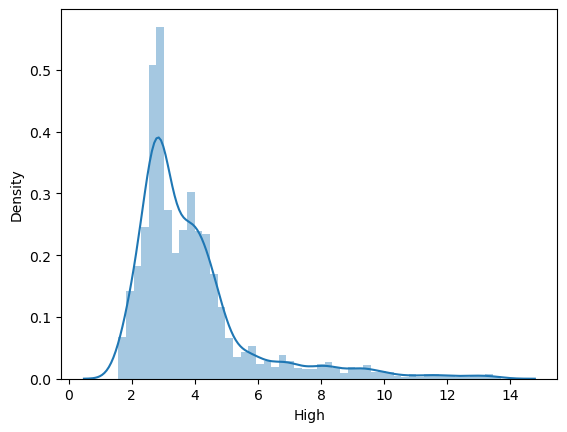

In [9]:
sns.distplot(data["High"])

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
X = data.drop("Close",axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
                                                
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3236, 4)
(809, 4)
(3236,)
(809,)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1

array([ 4.35648554,  4.78378776,  3.42711215,  2.54629783,  3.86938598,
        3.81422119,  3.77135204,  3.51547179,  2.99979176,  2.45576416,
        4.17626266,  3.06672444,  2.92356023,  3.73932249,  3.48511193,
        3.74103161,  1.73672929,  3.97620087,  2.70514177,  2.6953014 ,
        4.51087884,  3.85815793,  4.57790944,  2.15068905,  2.33234561,
        3.59771532,  2.6448264 ,  2.10785589,  3.76156263,  2.66549866,
        8.34339634,  4.09445603,  3.73007612,  2.23430922,  3.10038514,
        3.33118604,  3.31562547,  3.65128265,  1.76522511,  3.90422521,
        1.64125874, 11.88186255,  2.42620263,  3.22687668,  2.27822575,
        3.36319413,  9.74959583,  3.6670365 ,  5.4708201 ,  2.30968787,
        4.30215829,  2.14851347,  1.9641283 ,  9.24470631,  2.86009227,
        2.34677138,  3.73663936,  5.09022533,  4.21864811,  2.83091305,
        2.87610195,  3.66629788,  2.54186571,  2.87537845,  2.69391501,
        2.75499955,  3.60503322,  4.84428187,  5.55648806,  4.04

In [16]:
 from sklearn.metrics import mean_squared_error, r2_score
    
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,y_pred)
    
    print("MSE:- ",mse)
    print("RMSE:- ",rmse)
    print("R2_Score:- ",r2_scors)
    
calculate_metrics(y_test,pred1)

MSE:-  0.0028046050621431777
RMSE:-  0.0529585220917576
R2_Score:-  0.9991603960925617


In [17]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso().fit(X_train,y_train)
ri = Ridge().fit(X_train,y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [19]:
calculate_metrics(y_test, la_p)

MSE:-  0.28004211697104847
RMSE:-  0.5291900575134122
R2_Score:-  0.9161648608462122


In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid ={'C': [0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid,refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.098 total time=   1.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.105 total time=   1.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.052 total time=   1.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.082 total time=   1.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.083 total time=   1.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.097 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.106 total time=   1.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   1.6s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.082 total time=   1.7s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.083 total time=   1.7s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.096 total time=   1.6s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   1.7s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   1.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   2.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.007 total time=   1.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.010 total time=   1.8s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.008 total time=   1.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.007 total time=   1.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.002 total time=   2.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
svr_pred

array([3.83939614, 3.83939609, 3.83733859, 3.83939577, 3.40014455,
       3.83939609, 3.09906181, 3.83937557, 3.83939609, 3.83787122,
       3.83939609, 4.06426408, 3.83975373, 4.29983325, 5.24798975,
       5.39428844, 3.90873609, 3.83939609, 3.8225054 , 3.83939609,
       3.86182562, 3.82448874, 4.02824705, 3.210728  , 4.06927853,
       2.27345098, 2.53667666, 3.83939608, 3.83939609, 3.37005784,
       3.8393722 , 3.83939609, 3.8409853 , 5.14463722, 3.83939609,
       3.83925973, 3.7703774 , 3.5970251 , 3.83939609, 3.83939609,
       3.83939609, 3.99362147, 3.83939607, 3.83939609, 3.83939609,
       3.83939609, 3.7358679 , 4.30702733, 3.83201898, 3.93671362,
       3.83939609, 3.64404788, 3.83939588, 3.83939606, 3.8393961 ,
       3.73222923, 4.2524295 , 3.83928647, 3.93457646, 4.11022809,
       3.87608326, 3.83939609, 3.70263943, 3.83939609, 3.83939609,
       3.83939609, 2.22528133, 3.07412692, 3.83939609, 3.83939609,
       3.83939609, 3.83939609, 4.43327742, 3.83732382, 3.83433

In [29]:
print("Actual value:- ", y_test[0])
print("Model Predicted Value:- ",svr_pred[0])

Actual value:-  4.392000198364258
Model Predicted Value:-  3.8393961353918145


In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)

Mean squared error:  3.2459510339462914
Root mean squared error:  1.801652306619202
